In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [93]:
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.shape

(907, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

There seem to be a lot of null values in most columns
some columns are pretty much empty so we will drop them

Name, ID, URL , source and owner columns will not affect the model, also country is the same for all data so we can drop these columns too.

In [94]:
data.drop(['country','country_long','name','gppd_idnr','url','owner','wepp_id','other_fuel2','other_fuel3','generation_gwh_2019','estimated_generation_gwh','generation_gwh_2013','source','generation_data_source','year_of_capacity_data','geolocation_source'], axis = 1 , inplace = True)

In [16]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


we will also drop other fuel 1 as the majority of cells have no values

In [95]:
data.drop(['other_fuel1'], axis = 1 , inplace = True)

In [96]:
null_cols = ['latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

for col in null_cols:
  data[col].fillna(value= data[col].mean(), inplace=True)

In [20]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [21]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le = LabelEncoder()
data['primary_fuel'] = le.fit_transform(data['primary_fuel'])

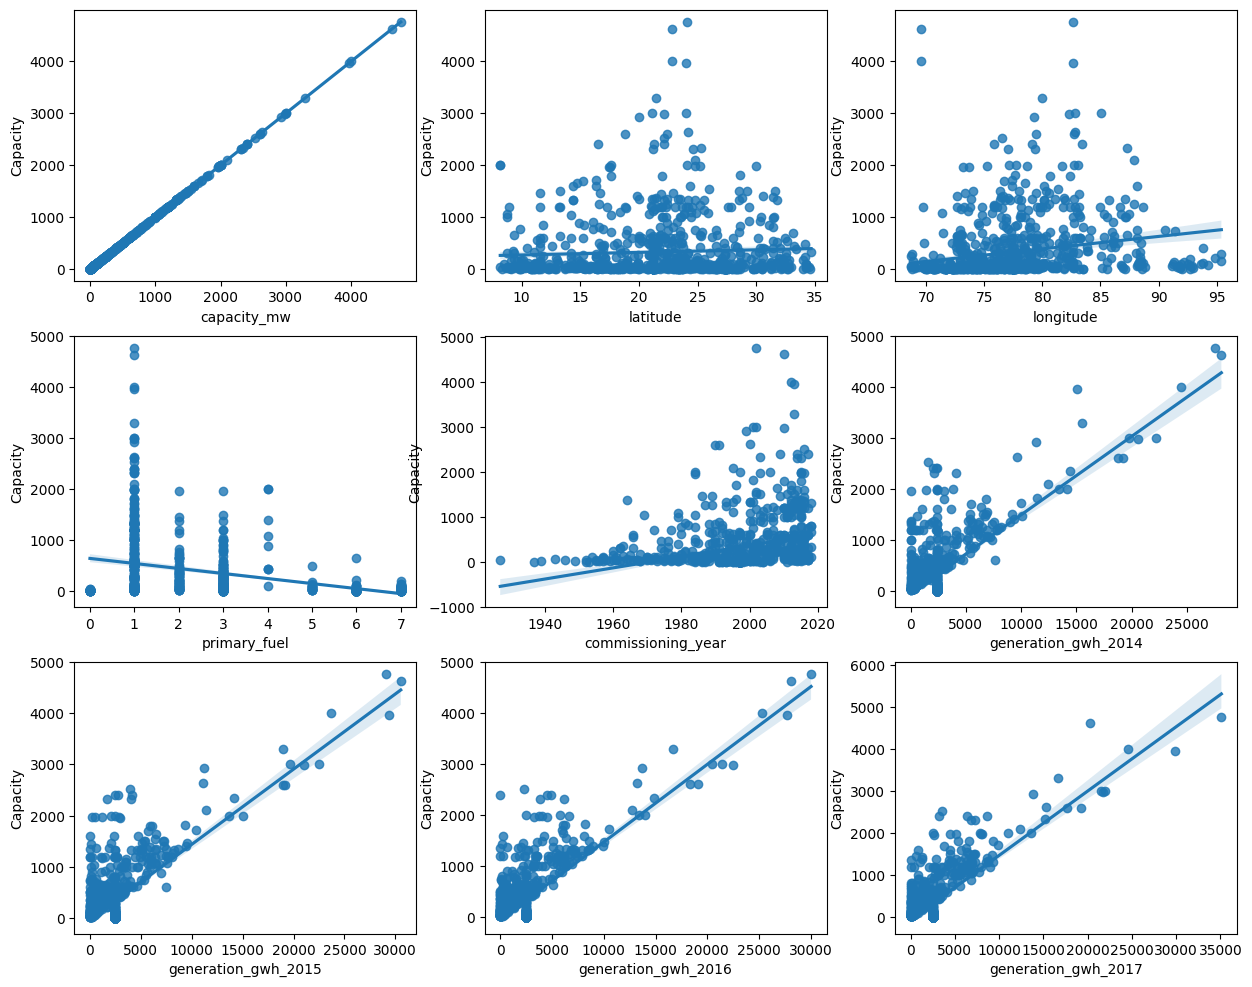

In [26]:
plt.figure(figsize = (15,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot(x = col , y = 'capacity_mw' , data=data)
        plt.xlabel(col)
        plt.ylabel('Capacity')
        plotnumber +=1

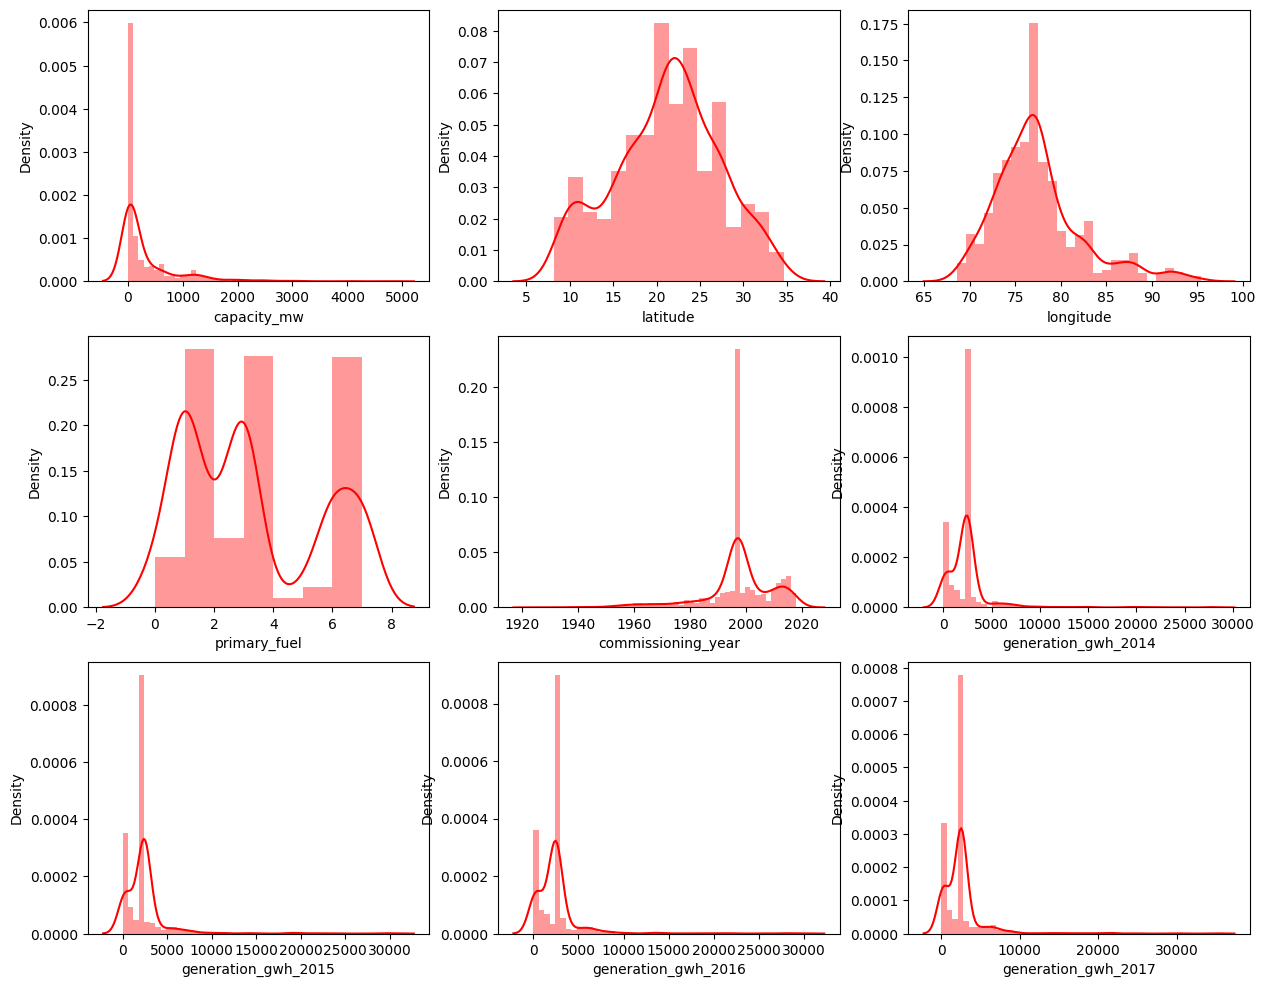

In [27]:
plt.figure(figsize = (15,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

<Axes: >

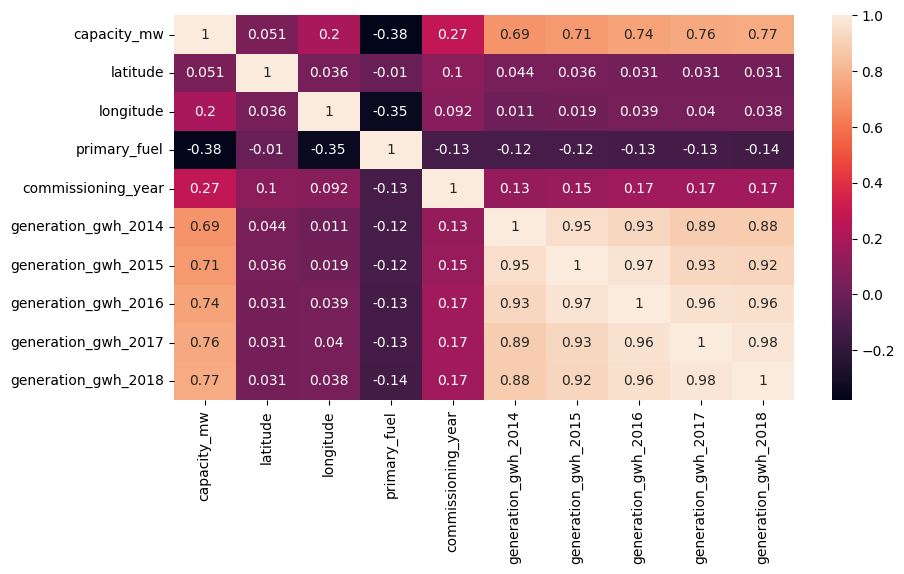

In [30]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot=True)

Generation in previous years has a strong relationship with capacity but they also have correlation with each other. dropping a column to solve multicolinearity might affect the model, so we could turn all generation columns into one

In [98]:
data['Average_generation'] = data[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].mean(axis=1)

In [99]:
data.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'], axis=1, inplace=True)

<Axes: >

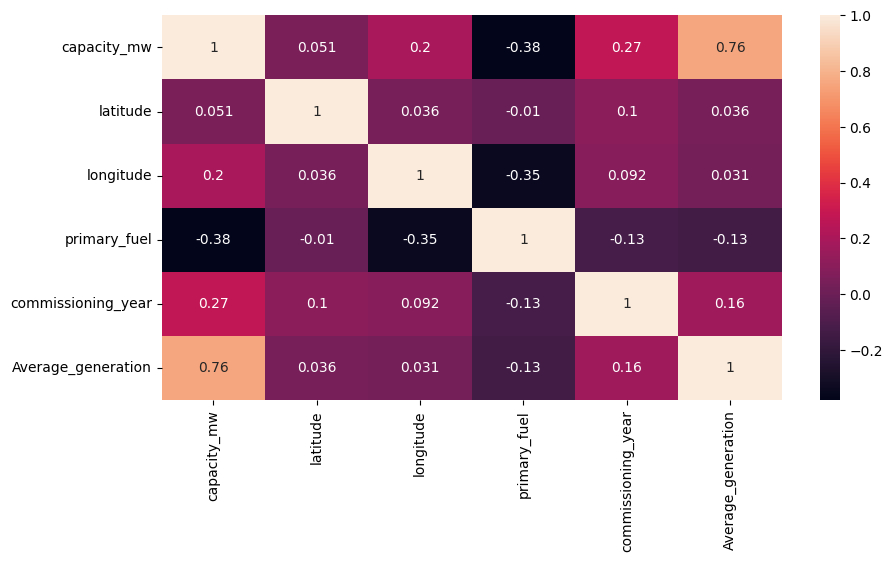

In [53]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot=True)

In [100]:
data.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
commissioning_year   -1.399359
Average_generation    5.219383
dtype: float64

In [101]:
data['capacity_mw'] = np.cbrt(data['capacity_mw'])
data['Average_generation'] = np.cbrt(data['Average_generation'])


In [103]:
data.skew()

capacity_mw           1.013378
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
commissioning_year   -1.399359
Average_generation   -0.030978
dtype: float64

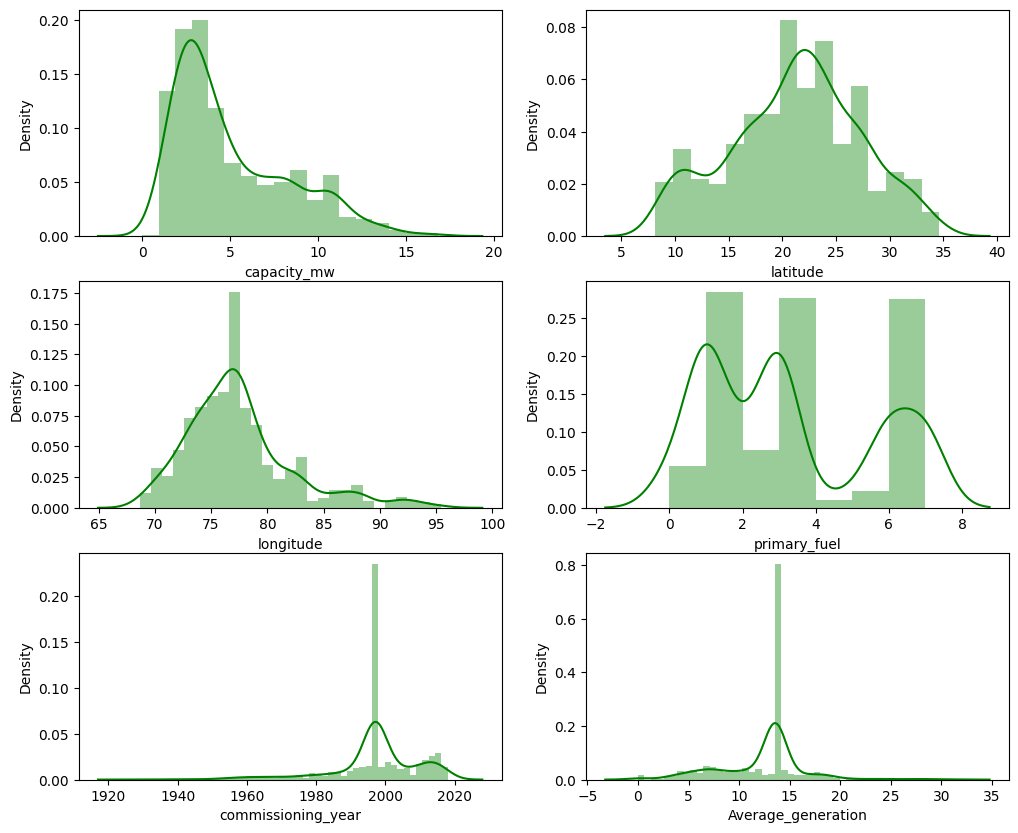

In [104]:
plt.figure(figsize = (12,10))
plotnumber = 1
for col in data.columns:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[col], color='g')
        plt.xlabel(col)
        plotnumber +=1

In [105]:
x = data.drop('capacity_mw', axis=1)
y = data['capacity_mw']

In [56]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN

In [110]:
MaxAccu = 0
MaxRS = 0
for i in range(1,400):
  x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.4851526680710846 
 Best Random State: 233


In [111]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=MaxRS)

**Linear Regression**

In [112]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.4851526680710846
R2_score for training data: 0.3336604324851
MAE: 2.005842150463804
MSE: 5.985589395444462
RMSE: 1.416277568297897


**Random Forest**

In [113]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = RFR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.8682702316956908
R2_score for training data: 0.976289712297433
MAE: 0.9225954774517828
MSE: 1.5314837143518378
RMSE: 0.9605183379049995


**KNN**

In [114]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.7971179802049316
R2_score for training data: 0.7991997469157712
MAE: 1.0962896761215812
MSE: 2.3586962404213874
RMSE: 1.047038526569859


**Gradient Boosting**

In [115]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.8805595857775715
R2_score for training data: 0.9242068991997113
MAE: 0.899035955908242
MSE: 1.3886082969076556
RMSE: 0.9481750660654614


**Decision Tree**

In [116]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
DTpred = DT.predict(x_test)
DT_trainpred = DT.predict(x_train)
print('R2_score:', r2_score(y_test,DTpred))
print('R2_score for training data:', r2_score(y_train,DT_trainpred))
print('MAE:', mean_absolute_error(y_test, DTpred))
print('MSE:', mean_squared_error(y_test, DTpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, DTpred)))

R2_score: 0.7661360805605464
R2_score for training data: 0.9979152028604872
MAE: 1.1702648231766124
MSE: 2.7188902600104035
RMSE: 1.0817877902697055


In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
score = cross_val_score(LR, x_scaled, y)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[0.33232098 0.25576088 0.37974798 0.39809491 0.45977247]
0.3651394433108637
Difference Between score mean and R2score: 0.12001322476022092


In [119]:
score1 = cross_val_score(RFR, x_scaled, y)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[0.85037126 0.88125193 0.82365374 0.86186553 0.85610813]
0.8546501182030575
Difference Between score mean and R2score: 0.013620113492633368


In [120]:
score2 = cross_val_score(knn, x_scaled, y)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.73305952 0.68293629 0.68268527 0.73657226 0.75076893]
0.7172044532644667
Difference Between score mean and R2score: 0.07991352694046494


In [121]:
score3 = cross_val_score(GBR, x_scaled, y)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[0.85509824 0.87388519 0.8312071  0.8492808  0.82426025]
0.8467463126470228
Difference Between score mean and R2score: 0.033813273130548716


In [122]:
score4 = cross_val_score(DT, x_scaled, y)
print(score4)
print(score4.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,DTpred)-score4.mean())

[0.77304445 0.75715208 0.75444346 0.77013615 0.77656166]
0.7662675592768788
Difference Between score mean and R2score: -0.000131478716332456


Text(0.5, 1.0, 'RandomForest')

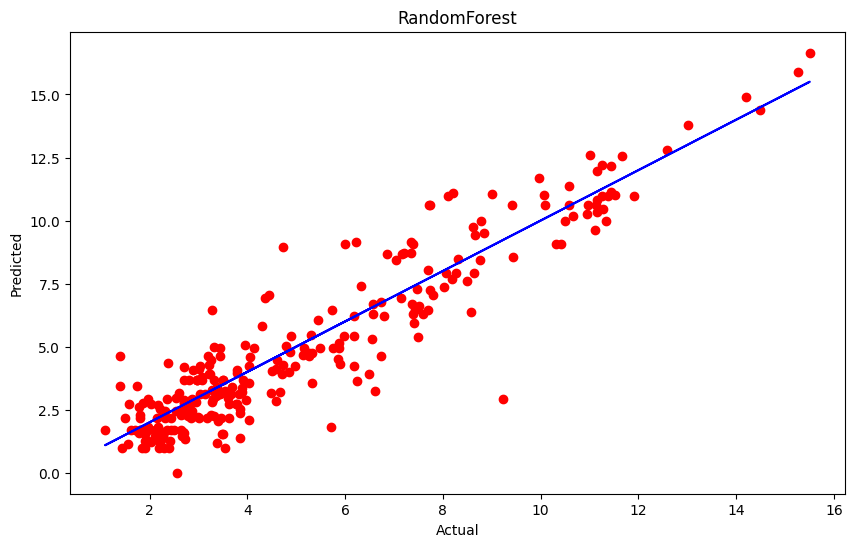

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(x=RFRpred,y=y_test,color='r')
plt.plot(RFRpred,RFRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest')

Text(0.5, 1.0, 'Decision Tree')

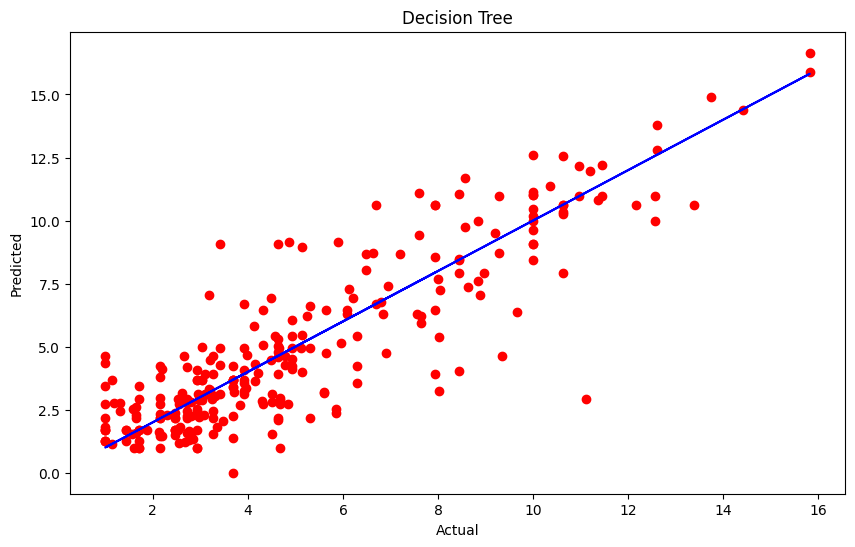

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(x=DTpred,y=y_test,color='r')
plt.plot(DTpred,DTpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

Random Forest is the best model

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param = {'criterion':['squared_error', 'friedman_mse'],'n_estimators':[50,100,200],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10,100], 'max_leaf_nodes': [2, 5, 10, 100]}
gscv = GridSearchCV(RandomForestRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [1, 3, 10, 100],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [2, 5, 10, 100],
                         'n_estimators': [50, 100, 200]})

In [127]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 100,
 'max_features': 'log2',
 'max_leaf_nodes': 100,
 'n_estimators': 100}

**Hyperparameter Tuning**

In [128]:
model = RandomForestRegressor(criterion= 'friedman_mse', max_depth= 100, max_features= 'log2', max_leaf_nodes= 100, n_estimators= 100)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred)))

R2_score: 0.8679009585528308
MAE: 0.936643666378246
MSE: 1.5357768654878148
RMSE: 0.9678035267440629


In [129]:
import joblib

In [130]:
joblib.dump(model,'powerplant_capacity.pk1')

['powerplant_capacity.pk1']

In [131]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred
df

,Actual,Prediction
0,3.914868,5.561750
1,1.650964,3.439784
2,3.107233,3.075428
3,6.299605,6.218592
4,1.216440,1.840456
...,...,...
268,1.532619,3.345928
269,9.085603,7.540571
270,2.289428,2.123723
271,2.154435,3.133305


# Predicting Fuel Type


We already know the correlation of fuel type is not very high with the other feautures



<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

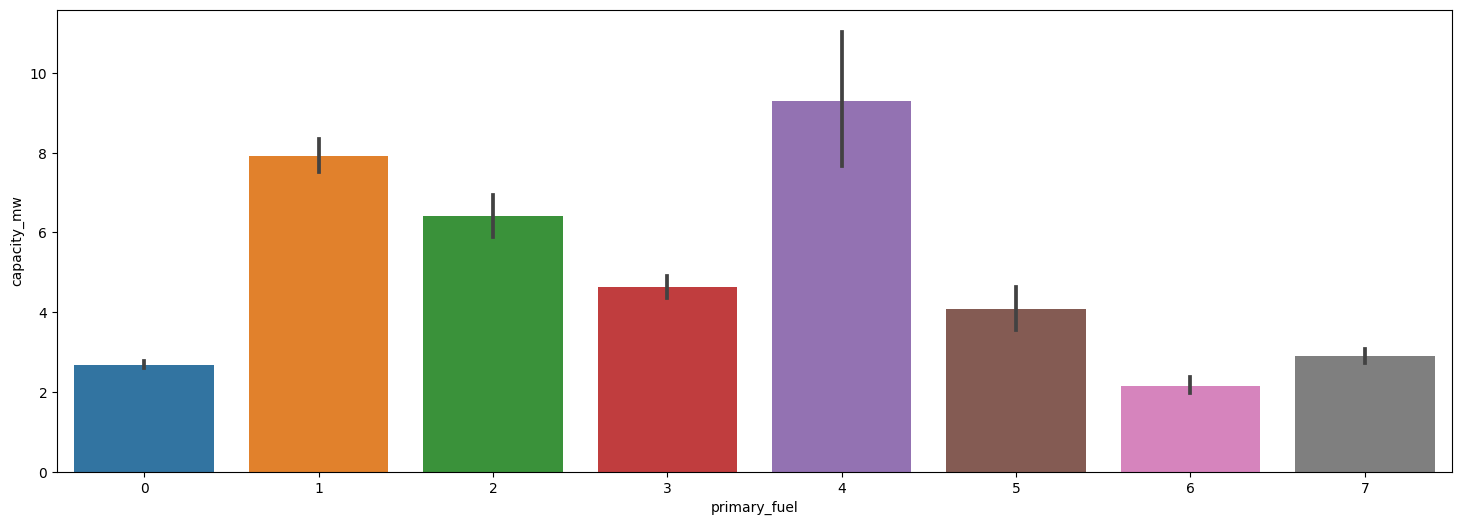

In [132]:
plt.figure(figsize=(18,6))
sns.barplot(x = data['primary_fuel'], y=data['capacity_mw'])

<Axes: xlabel='primary_fuel', ylabel='Average_generation'>

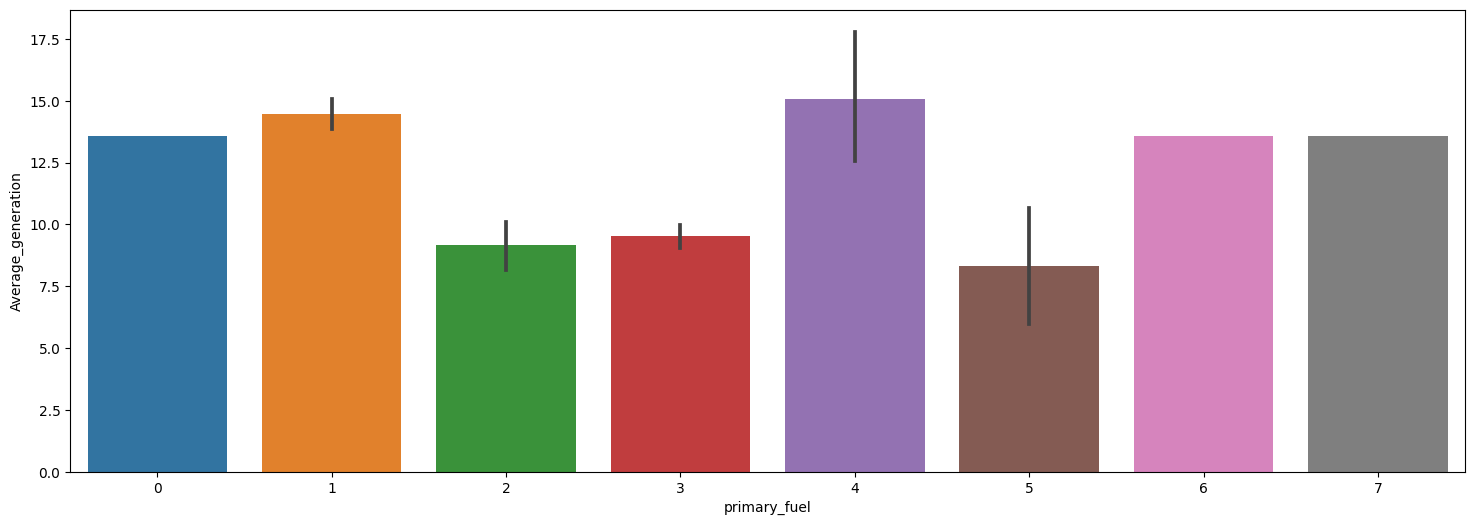

In [133]:
plt.figure(figsize=(18,6))
sns.barplot(x = data['primary_fuel'], y=data['Average_generation'])

In [134]:
x1 = data.drop('primary_fuel', axis=1)
y1 = data['primary_fuel']

In [135]:
x1_scaled = pd.DataFrame(scaler.fit_transform(x1), columns= x1.columns)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [137]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x1_scaled,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.6483516483516484 
 Best Random State: 152


In [138]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [139]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest Classifier**

In [140]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.7912087912087912
[[10  0  0  0  0  0  1  2]
 [ 0 65  3  6  0  0  0  3]
 [ 0  4  7  3  0  2  0  1]
 [ 0  1  1 71  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  1  1  0  2  0  0]
 [ 0  2  0  0  0  0 33  7]
 [ 5  6  0  0  0  0  4 28]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.80      0.84      0.82        77
           2       0.58      0.41      0.48        17
           3       0.87      0.97      0.92        73
           4       0.00      0.00      0.00         3
           5       0.50      0.40      0.44         5
           6       0.87      0.79      0.82        42
           7       0.68      0.65      0.67        43

    accuracy                           0.79       273
   macro avg       0.62      0.60      0.61       273
weighted avg       0.78      0.79      0.78       273



**Gardient Boosting**

In [141]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.7802197802197802
[[ 9  0  0  0  0  0  1  3]
 [ 0 65  3  7  0  0  0  2]
 [ 0  3  9  2  0  3  0  0]
 [ 0  2  1 70  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  2  0  1  0  2  0  0]
 [ 0  4  0  0  0  0 31  7]
 [ 4  7  0  0  0  0  5 27]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.76      0.84      0.80        77
           2       0.69      0.53      0.60        17
           3       0.86      0.96      0.91        73
           4       0.00      0.00      0.00         3
           5       0.40      0.40      0.40         5
           6       0.84      0.74      0.78        42
           7       0.69      0.63      0.66        43

    accuracy                           0.78       273
   macro avg       0.62      0.60      0.61       273
weighted avg       0.77      0.78      0.77       273



**Bagging**

In [142]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.7838827838827839
[[ 8  1  0  0  0  0  1  3]
 [ 0 64  4  6  0  0  0  3]
 [ 0  5  8  0  0  3  0  1]
 [ 0  2  3 68  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  0  1  0  3  0  0]
 [ 0  1  0  0  0  0 32  9]
 [ 4  4  0  0  0  0  4 31]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.80      0.83      0.82        77
           2       0.53      0.47      0.50        17
           3       0.89      0.93      0.91        73
           4       0.00      0.00      0.00         3
           5       0.50      0.60      0.55         5
           6       0.86      0.76      0.81        42
           7       0.66      0.72      0.69        43

    accuracy                           0.78       273
   macro avg       0.61      0.62      0.61       273
weighted avg       0.78      0.78      0.78       273



In [146]:
score = cross_val_score(RFC, x1_scaled,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.77472527 0.81318681 0.82872928 0.79005525 0.75690608]
0.7927205391293789
Difference Between score mean and accuracy score: -0.0015117479205877249


In [147]:
score1 = cross_val_score(GBC, x1_scaled,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score1.mean())

[0.85509824 0.87388519 0.8312071  0.8492808  0.82426025]
0.8467463126470228
Difference Between score mean and accuracy score: 0.013927508955133283


In [148]:
score2 = cross_val_score(BC, x1_scaled,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score2.mean())

[0.77304445 0.75715208 0.75444346 0.77013615 0.77656166]
0.7662675592768788
Difference Between score mean and accuracy score: 0.014287738044644116


In [149]:
param = {'loss': ['log_loss', 'exponential'] ,'criterion': ['friedman_mse', 'squared_error'], 'n_estimators':[50,100,200,300,500], 'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2, 0.5]}
gscv = GridSearchCV(GBC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2, 0.5],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [50, 100, 200, 300, 500]})

In [150]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'n_estimators': 500}

**Hyperparameter Tuning**

In [152]:
model2 = GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.1,loss= 'log_loss', n_estimators= 500)
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

0.7728937728937729
[[10  0  0  0  0  0  1  2]
 [ 1 63  2  8  0  0  1  2]
 [ 0  3  9  1  0  3  1  0]
 [ 0  3  2 68  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  0  1  0  2  1  0]
 [ 0  2  0  0  0  0 32  8]
 [ 5  9  0  0  0  0  2 27]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.76      0.82      0.79        77
           2       0.69      0.53      0.60        17
           3       0.86      0.93      0.89        73
           4       0.00      0.00      0.00         3
           5       0.40      0.40      0.40         5
           6       0.84      0.76      0.80        42
           7       0.69      0.63      0.66        43

    accuracy                           0.77       273
   macro avg       0.61      0.60      0.60       273
weighted avg       0.76      0.77      0.77       273



In [153]:
joblib.dump(model2,'powerplant_fuel.pk1')

['powerplant_fuel.pk1']

In [154]:
df2 = pd.DataFrame()
actual = np.array(y_test)
df2['Actual'] = actual
df2['Prediction'] = pred2
df2

,Actual,Prediction
0,1,1
1,1,3
2,2,2
3,2,6
4,1,1
...,...,...
268,7,7
269,3,3
270,1,1
271,7,7
